In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


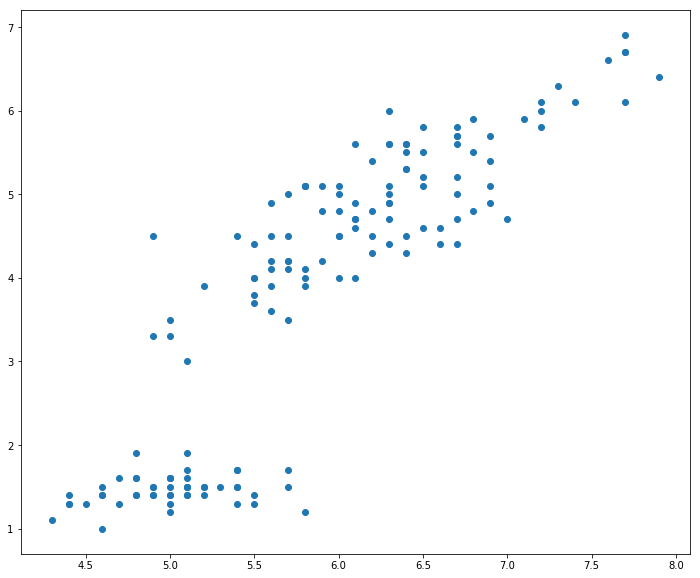

In [4]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'])

In [5]:
df.labels, df.uniques = pd.factorize(df['Species'])
df.labels, df.uniques

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

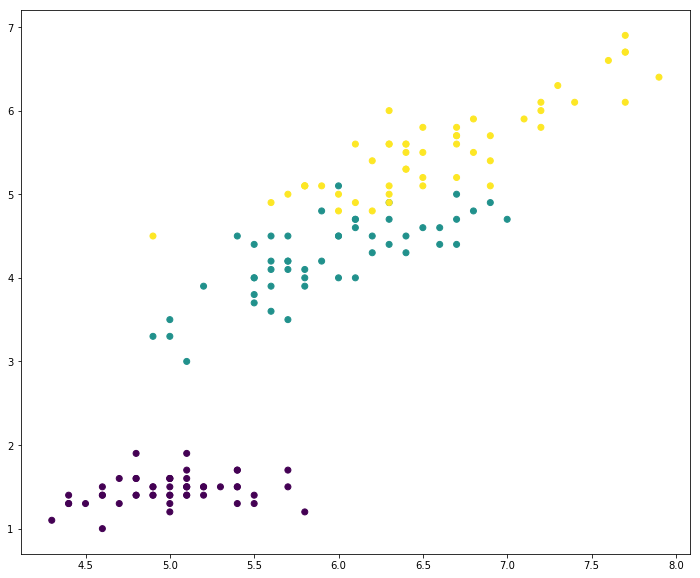

In [6]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'], c=df.labels)

In [7]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

x = df[['Sepal.Length', 'Petal.Length']].as_matrix()
y = df.labels

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
tree.fit(x, y)

z = tree.predict(x)

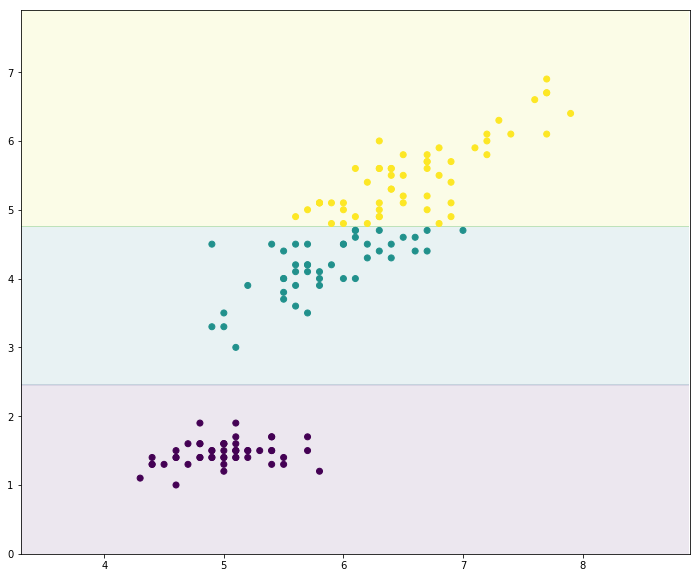

In [8]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# area

step = 0.01
xv, yv = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))
zv = tree.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=0.1)

# scatter

plt.scatter(x[:, 0], x[:, 1], c=z)

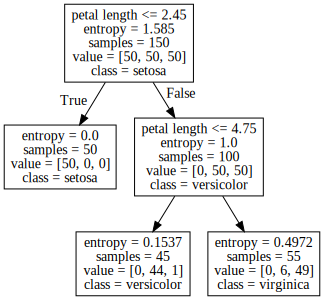

In [9]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree,
    feature_names=['sepal length', 'petal length'],
    class_names=df.uniques.values,
    out_file=None
)

graphviz.Source(dot_data)

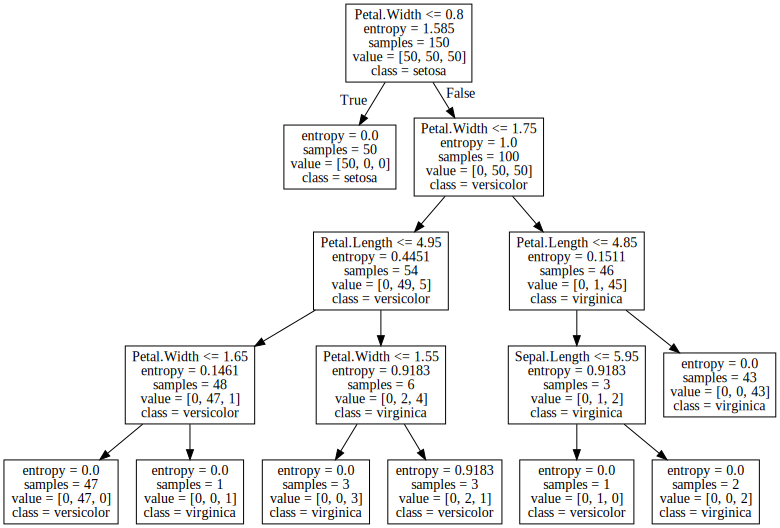

In [10]:
# Feature와 Depth 늘리기

features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

x = df[features].as_matrix()
y = df.labels

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(x, y)

dot_data = export_graphviz(
    tree,
    feature_names=features,
    class_names=df.uniques.values,
    out_file=None
)
graphviz.Source(dot_data)

linear


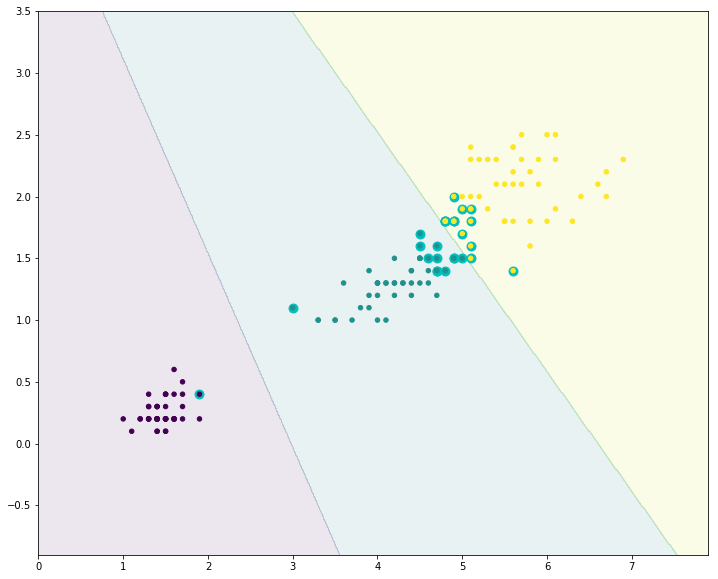

poly


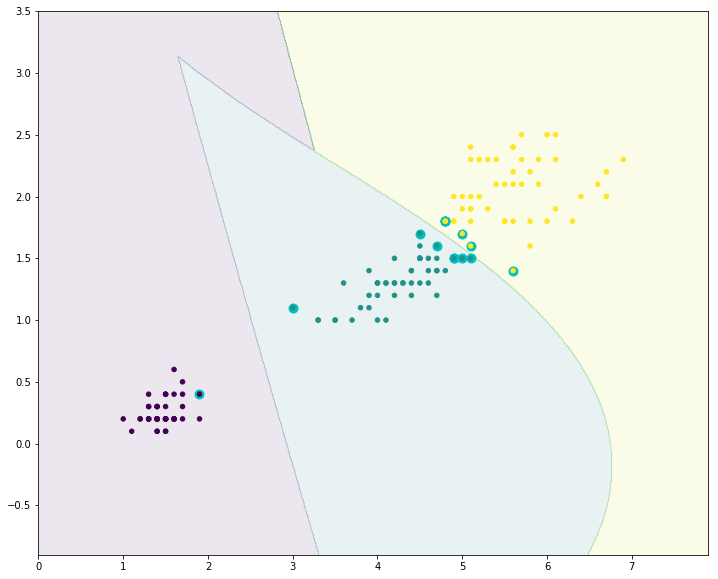

rbf


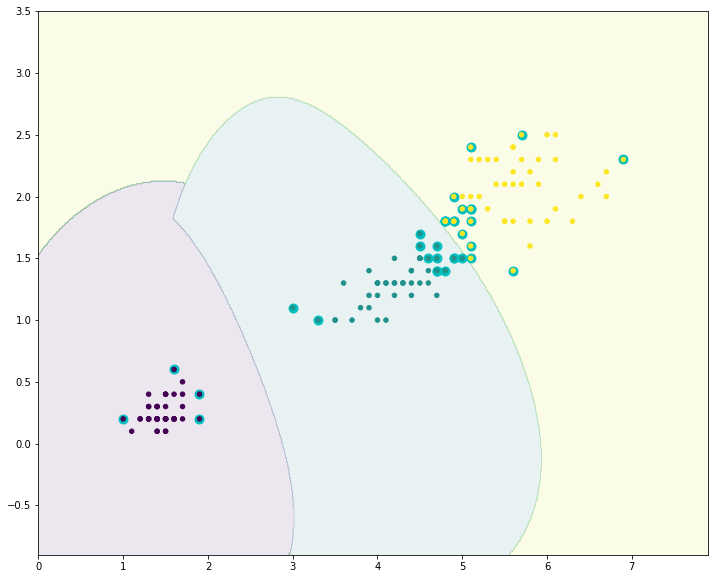

In [11]:
# SVM

import numpy as np
from sklearn.svm import SVC

x = df[['Petal.Length', 'Petal.Width']].as_matrix()
y = df.labels

for kernel in ['linear', 'poly', 'rbf']:
    print(kernel)

    svc = SVC(kernel=kernel, C=1.0, random_state=0)
    svc.fit(x, y)

    z = svc.predict(x)

    # ready

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # area

    step = 0.01
    xv, yv = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    zv = svc.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

    plt.contourf(xv, yv, zv.reshape(xv.shape), alpha=0.1)

    # support vectors

    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='c', s=80)

    # scatter

    plt.scatter(x[:, 0], x[:, 1], c=z, s=20)

    plt.show()